In [2]:
import pandas as pd
from KDD_f2 import *
import matplotlib.pyplot as plt


In [3]:


df = pd.read_csv("../data/output/hour_S_bal_over_norm.csv")
#df = pd.read_csv("../data/hour.csv")
print("number of instances: ", df.shape[0])

print(df.head())

X_train, y_train, X_test, y_test = data_split(df, 'cnt')

print(X_train.head())
#print(X_train.columns.tolist())
print(X_train.shape[0], X_test.shape[0])

number of instances:  164480
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        0  2011-01-01       1   0     1   0        0        6           0   
1        1  2011-01-01       1   0     1   1        0        6           0   
2        2  2011-01-01       1   0     1   2        0        6           0   
3        3  2011-01-01       1   0     1   3        0        6           0   
4        4  2011-01-01       1   0     1   4        0        6           0   

   weathersit   temp    hum  windspeed  cnt  
0           1  15.44  81.00       0.00   16  
1           1  14.82  80.00       0.00   40  
2           1  15.13  77.50       0.00   32  
3           1  15.48  74.69       0.38   13  
4           1  15.48  74.69       3.38    1  
number of instances:   131582
          attributes:  33
        yr  hr  holiday  workingday   temp    hum  windspeed  season_2  \
54726    1  10        0           1  31.60  60.06      13.06         0   
13799    1  20        

In [4]:

rf = RandomForestRegressor(max_depth=5, n_estimators = 6000, random_state=42)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict Test Data
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)



Mean Squared Error (MSE): 586.6551245449655
Root Mean Squared Error (RMSE): 24.220964566774907
Mean Absolute Error (MAE): 10.605533814330323
R^2 Score: 0.9830615590021706


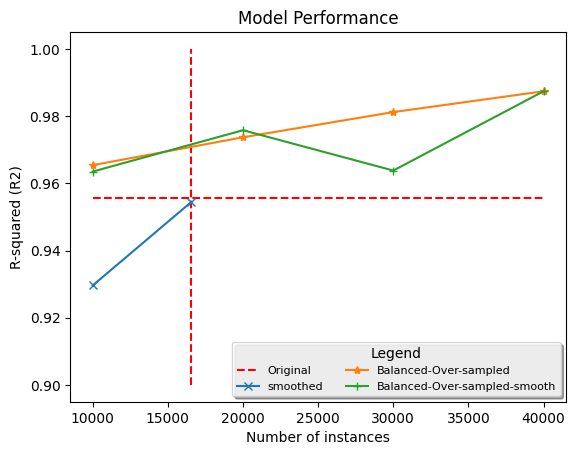

In [19]:
import matplotlib.pyplot as plt

             #Original	  smoothed		Balanced-Over-sampled			Balanced-Over-sampled-smooth			
instances =  [16522,	10000,	16522,	10000,	20000,	30000,	40000,	10000,	20000,	30000,	40000] #Number of instances
r2 =         [0.9555,	0.9296,	0.9543,	0.9654,	0.9737,	0.9812,	0.9874,	0.9635,	0.9758,	0.9638,	0.9874] #R-squared (R2)
mae =        [20.83,	25.72,	21.20,	24.22,	19.86,	16.79,	12.86,	22.44,	17.6,	22.34,	12.86] #Mean absolute error (MAE)
rmse =       [33.2,	40.4,	33.66,	34.69,	29.86,	25.2,	20.68,	34.96,	28.7,	35.44,	20.68] #Root mean squared error (RMSE)

# r2 - instances

x0= [10000, 40000]
y0 = [r2[0], r2[0]]

x1 = [instances[0], instances[0]]
y1 = [0.9, 1]

x2 = instances[1:3]
y2 = r2[1:3]
x3 = instances[3:7]
y3 = r2[3:7]
x4 = instances[7:]
y4 = r2[7:]

# Plotting the first graph
plt.plot(x0, y0, label='Original', color='red', linestyle='--')
plt.plot(x1, y1, color='red', linestyle='--',)


plt.plot(x2, y2, label='smoothed', marker='x')
plt.plot(x3, y3, label='Balanced-Over-sampled', marker='*')
plt.plot(x4, y4, label='Balanced-Over-sampled-smooth', marker='+')

# Plotting the values

# Adding labels and title
plt.xlabel('Number of instances')
plt.ylabel('R-squared (R2)')
plt.title('Model Performance')

# Displaying the graph
plt.legend(
    loc='lower right',      # Position the legend in the lower right corner
    title='Legend',         # Title of the legend
    shadow=True,            # Draw a shadow behind the legend
    frameon=True,           # Draw a frame around the legend
    fontsize='8',       # Font size of the legend text
    title_fontsize='medium',# Font size of the legend title
    ncol=2,                 # Use 2 columns in the legend
    framealpha=0.8          # Set the transparency of the legend frame
)

plt.show()

In [4]:
df_under = pd.read_csv("./data/output/hour_S_bal_under_norm.csv")
df_orginal = pd.read_csv("./data/output/hour_original.csv")
df_over = pd.read_csv("./data/output/hour_S_bal_over_norm.csv")

process_list = [10,15,20,25,30,35,40,45 ]

for process in process_list:

df_over40k = df_over.sample(n=40000, random_state=42)
final_models, model_list = modelSelector(df_over40k, 'over40k_B', 'cnt')

number of instances:   31998
          attributes:  33
 
Root Mean Squared Error (RMSE): 150.74246029896236
Mean Absolute Error (MAE): 126.92378617750961
R^2 Score: 0.33352188379414405
 
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END ...............

KeyboardInterrupt: 